# INF221 Sorting Algortihm Comparison

In [1]:
import numpy as np 
import timeit 
import copy
import pandas as pd
import math as m
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.titlesize'] = 9
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['text.usetex'] = True

def new_figure(height=40):
    "Return figure with width 84mm and given height in mm."

    return plt.figure(figsize=(84/25.4, height/25.4))

def new_subplots(n_rows, n_cols=1, height = None):
    if height is None:
        height = 35*n_rows
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(84/25.4, height/25.4))
    return figure, axes

In [2]:
sort_algs = ['bubble_sort', 'insertion_sort', 'merge_sort', 'merge_insertion_sort', 'sorted', 'Numpy_sort', 'quick_sort','middle_quick_sort','randomized_quick_sort',]
n_sort_alg = len(sort_algs)
sort_alg_titles = [alg.replace("_", " ") for alg in sort_algs]

for i,string in enumerate(sort_alg_titles):
    sort_alg_titles[i] = string.replace('sorted', 'Python sort')

plot_colors = ['b', 'r', 'm','darkorange', 'c', 'brown', 'g', 'silver', 'gold']

In [3]:
plot_dir = 'Plots/'

## Load data from pickle

In [4]:
t_random_data = [0]*n_sort_alg
t_sorted_data = [0]*n_sort_alg
t_reverse_data = [0]*n_sort_alg
t_random_data_small = [0]*n_sort_alg
    

n_datas_random = [0]*n_sort_alg
n_datas_sorted = [0]*n_sort_alg
n_datas_reverse = [0]*n_sort_alg
n_datas_random_small= [0]*n_sort_alg

result_dir = 'Results/'
image = 0

alg_index_dict = {}

for i in range(n_sort_alg):
    sort_alg = sort_algs[i]
    alg_index_dict[sort_alg] = i
    t_random_data[i] = pd.read_pickle(result_dir+sort_alg+'_random_time.pkl').to_numpy()[:,1].tolist()
    t_sorted_data[i] = pd.read_pickle(result_dir+sort_alg+'_sorted_time.pkl').to_numpy()[:,1].tolist()
    t_reverse_data[i] = pd.read_pickle(result_dir+sort_alg+'_reverse_time.pkl').to_numpy()[:,1].tolist()
    
    n_datas_random[i] = pd.read_pickle(result_dir+sort_alg+'_random_time.pkl').to_numpy()[:,0].tolist()
    n_datas_sorted[i] = pd.read_pickle(result_dir+sort_alg+'_sorted_time.pkl').to_numpy()[:,0].tolist()
    n_datas_reverse[i] = pd.read_pickle(result_dir+sort_alg+'_reverse_time.pkl').to_numpy()[:,0].tolist()
    
    t_random_data_small[i] = pd.read_pickle(result_dir+sort_alg+'_small_random_time.pkl').to_numpy()[:,1].tolist()
    n_datas_random_small[i] = pd.read_pickle(result_dir+sort_alg+'_small_random_time.pkl').to_numpy()[:,0].tolist()

## Check that intervals are the same

In [5]:
def check_intervals(sort_algs, data):
    
    n_sort_alg = len(sort_algs)
    
    data_diff = [data[0][j+1] - data[0][j] for j in range(len(data[0])-1)]

    n_list = len(data)
    if min(data_diff) == max(data_diff):
        interval = max(data_diff)
    else:
        print('ERROR: Interval of {0:s} is not constant'.format(sort_algs[0]))
        return

    for i in range(1,n_sort_alg):
        data_diff = [data[i][j+1] - data[i][j] for j in range(len(data[i])-1)]

        if min(data_diff) == max(data_diff):
            if max(data_diff)!=interval:
                print('ERROR: Interval of {0:s} is not the same as previous'. format(sort_algs[i]))
                return
        else:
            print('ERROR: Interval of {0:s} is not constant'.format(sort_algs[i]))
            return

In [6]:
check_intervals(sort_algs, n_datas_random)

In [7]:
check_intervals(sort_algs, n_datas_sorted)

In [8]:
check_intervals(sort_algs, n_datas_reverse)

In [9]:
check_intervals(sort_algs, n_datas_random_small)

## Append data with None to match in length

In [10]:
def appendNone(max_n, A):
    n = len(A)
    
    if n==max_n:
        return
    elif n> max_n:
        print('ERROR: max_n needs to be the maximum length of any list. Some list had length higher than max_n')
        return
    else:
        diff = max_n-n
        A.extend([None]*diff)

In [11]:
max_n_datasets_random = max([len(t) for t in t_random_data])
max_n_datasets_sorted = max([len(t) for t in t_sorted_data])
max_n_datasets_reverse = max([len(t) for t in t_reverse_data])
max_n_datasets_random_small = max([len(t) for t in t_random_data_small])

for i in range(n_sort_alg):
    appendNone(max_n_datasets_random, t_random_data[i])
    appendNone(max_n_datasets_sorted, t_sorted_data[i])
    appendNone(max_n_datasets_reverse, t_reverse_data[i])
    appendNone(max_n_datasets_random_small, t_random_data_small[i])
    
    appendNone(max_n_datasets_random, n_datas_random[i])
    appendNone(max_n_datasets_sorted, n_datas_sorted[i])
    appendNone(max_n_datasets_reverse, n_datas_reverse[i])

## Comparison Plots

In [12]:
# Creating legend for all plots
fig = new_figure()
patches = [
    matplotlib.patches.Patch(color=color, label=label)
    for label, color in zip(sort_alg_titles, plot_colors)]
fig.legend(patches, sort_alg_titles, loc='center', frameon=False);
fig.savefig(plot_dir+'Sorting_Alg_Legend.pdf');

<Figure size 238.11x113.386 with 0 Axes>

In [13]:
def find_last_non_nan(l):
    n = len(l)
    
    for i in range(n):
        if l[i] is None:
            break
    return i-1

In [14]:
plot_order = []

### Random data

In [15]:
plot_order_index = 0
plot_order.append(list(enumerate([t_random_data[i][find_last_non_nan(t_random_data[i])] for i in range(n_sort_alg-2)])))
plot_order[plot_order_index] = sorted(plot_order[plot_order_index], reverse = True, key=lambda x: x[1])
plot_order[plot_order_index] = [tup[0] for tup in plot_order[plot_order_index]]

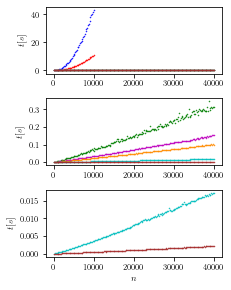

In [16]:

figure, axes = new_subplots(n_rows=3)

ax = axes[0]
ax.set_ylabel('$t [s]$')
for i in plot_order[plot_order_index][:]:
    ax.plot(n_datas_random[i], t_random_data[i], label=sort_alg_titles[i], color = plot_colors[i], marker = '.', markersize = 1, linestyle = 'None')

ax = axes[1]
ax.set_ylabel('$t [s]$')
for i in plot_order[plot_order_index][-5:]:
    ax.plot(n_datas_random[i], t_random_data[i], label=sort_alg_titles[i], color = plot_colors[i], marker = '.', markersize = 1, linestyle = 'None')

ax = axes[2]
ax.set_ylabel('$t [s]$')
for i in plot_order[plot_order_index][-2:]:
    ax.plot(n_datas_random[i], t_random_data[i], label=sort_alg_titles[i], color = plot_colors[i], marker = '.', markersize = 1, linestyle = 'None')

ax.set_xlabel('$n$')
figure.tight_layout()

 
figure.savefig(plot_dir+'Plot_Random.pdf', bbox_inches='tight')

### Sorted data

In [17]:
plot_order_index = 1
plot_order.append(list(enumerate([t_sorted_data[i][find_last_non_nan(t_sorted_data[i])] for i in range(n_sort_alg-2)])))
plot_order[plot_order_index] = sorted(plot_order[plot_order_index], reverse = True, key=lambda x: x[1])
plot_order[plot_order_index] = [tup[0] for tup in plot_order[plot_order_index]]

In [18]:
t_sorted_data[alg_index_dict['quick_sort']][13]/t_sorted_data[alg_index_dict['middle_quick_sort']][13]


143.2757481722092

In [19]:
t_reverse_data[alg_index_dict['quick_sort']][13]/t_reverse_data[alg_index_dict['middle_quick_sort']][13]

92.54888622081978

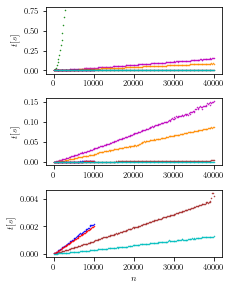

In [20]:
figure, axes = new_subplots(n_rows=3)

ax = axes[0]
ax.set_ylabel('$t [s]$')
for i in plot_order[plot_order_index][:]:
    ax.plot(n_datas_sorted[i], t_sorted_data[i], label=sort_alg_titles[i], color = plot_colors[i], marker = '.', markersize = 1, linestyle = 'None')

ax = axes[1]
ax.set_ylabel('$t [s]$')
for i in plot_order[plot_order_index][-6:]:
    ax.plot(n_datas_sorted[i], t_sorted_data[i], label=sort_alg_titles[i], color = plot_colors[i], marker = '.', markersize = 1, linestyle = 'None')    
    
ax = axes[2]
ax.set_ylabel('$t [s]$')
for i in plot_order[plot_order_index][-4:]:
    ax.plot(n_datas_sorted[i], t_sorted_data[i], label=sort_alg_titles[i], color = plot_colors[i], marker = '.', markersize = 1, linestyle = 'None')

ax.set_xlabel('$n$')

figure.tight_layout()


 
figure.savefig(plot_dir+'Plot_Sorted.pdf', bbox_inches='tight')



### Reverse data

In [21]:
plot_order_index = 2
plot_order.append(list(enumerate([t_reverse_data[i][find_last_non_nan(t_reverse_data[i])] for i in range(n_sort_alg-2)])))
plot_order[plot_order_index] = sorted(plot_order[plot_order_index], reverse = True, key=lambda x: x[1])
plot_order[plot_order_index] = [tup[0] for tup in plot_order[plot_order_index]]

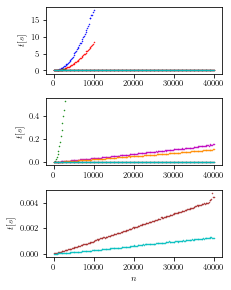

In [22]:
figure, axes = new_subplots(n_rows=3)

ax = axes[0]
ax.set_ylabel('$t [s]$')
for i in plot_order[plot_order_index][:]:
    ax.plot(n_datas_reverse[i], t_reverse_data[i], label=sort_alg_titles[i], color = plot_colors[i], marker = '.', markersize = 1, linestyle = 'None')

ax = axes[1]
ax.set_ylabel('$t [s]$')
for i in plot_order[plot_order_index][-5:]:
    ax.plot(n_datas_reverse[i], t_reverse_data[i], label=sort_alg_titles[i], color = plot_colors[i], marker = '.', markersize = 1, linestyle = 'None')
    
ax = axes[2]
ax.set_ylabel('$t [s]$')
for i in plot_order[plot_order_index][-2:]:
    ax.plot(n_datas_reverse[i], t_reverse_data[i], label=sort_alg_titles[i], color = plot_colors[i], marker = '.', markersize = 1, linestyle = 'None')

ax.set_xlabel('$n$')

figure.tight_layout()

 
figure.savefig(plot_dir+'Plot_Reverse.pdf', bbox_inches='tight')


### Small datasets

In [23]:
plot_order_index = 3
plot_order.append(list(enumerate([t_random_data_small[i][find_last_non_nan(t_random_data_small[i])] for i in range(n_sort_alg-2)])))
plot_order[plot_order_index]
plot_order[plot_order_index] = sorted(plot_order[plot_order_index], reverse = True, key=lambda x: x[1])
plot_order[plot_order_index] = [tup[0] for tup in plot_order[plot_order_index]]

In [24]:
n_plotted_data = 40

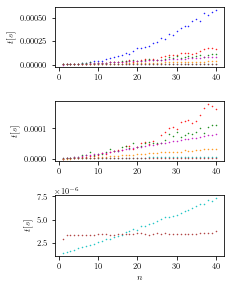

In [25]:
figure, axes = new_subplots(n_rows=3)

ax = axes[0]
ax.set_ylabel('$t [s]$')
for i in plot_order[plot_order_index][:]:
    ax.plot(n_datas_random_small[i][:n_plotted_data], t_random_data_small[i][:n_plotted_data], label=sort_alg_titles[i], color = plot_colors[i], marker = '.', markersize = 1, linestyle = 'None')

ax = axes[1]
ax.set_ylabel('$t [s]$')
for i in plot_order[plot_order_index][-6:]:
    ax.plot(n_datas_random_small[i][:n_plotted_data], t_random_data_small[i][:n_plotted_data], label=sort_alg_titles[i], color = plot_colors[i], marker = '.', markersize = 1, linestyle = 'None')

ax = axes[2]
ax.set_ylabel('$t [s]$')
for i in plot_order[plot_order_index][-2:]:
    ax.plot(n_datas_random_small[i][:n_plotted_data], t_random_data_small[i][:n_plotted_data], label=sort_alg_titles[i], color = plot_colors[i], marker = '.', markersize = 1, linestyle = 'None')

ax.set_xlabel('$n$')

figure.tight_layout()

 
figure.savefig(plot_dir+'Plot_Random_Small.pdf', bbox_inches='tight')




In [26]:
n_plotted_data = 20

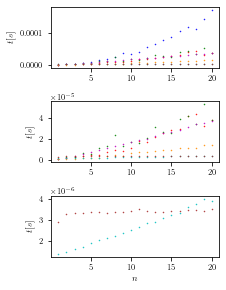

In [27]:
figure, axes = new_subplots(n_rows=3)

ax = axes[0]
ax.set_ylabel('$t [s]$')
for i in plot_order[plot_order_index][:]:
    ax.plot(n_datas_random_small[i][:n_plotted_data], t_random_data_small[i][:n_plotted_data], label=sort_alg_titles[i], color = plot_colors[i], marker = '.', markersize = 1, linestyle = 'None')

ax = axes[1]
ax.set_ylabel('$t [s]$')
for i in plot_order[plot_order_index][-6:]:
    ax.plot(n_datas_random_small[i][:n_plotted_data], t_random_data_small[i][:n_plotted_data], label=sort_alg_titles[i], color = plot_colors[i], marker = '.', markersize = 1, linestyle = 'None')

ax = axes[2]
ax.set_ylabel('$t [s]$')
for i in plot_order[plot_order_index][-2:]:
    ax.plot(n_datas_random_small[i][:n_plotted_data], t_random_data_small[i][:n_plotted_data], label=sort_alg_titles[i], color = plot_colors[i], marker = '.', markersize = 1, linestyle = 'None')

ax.set_xlabel('$n$')

figure.tight_layout()
figure.savefig(plot_dir+'Plot_Random_Smaller.pdf', bbox_inches='tight')




## Testing complexity

In [32]:
plot_order_index = 0 # plotting random data

### Quadratic algorithms

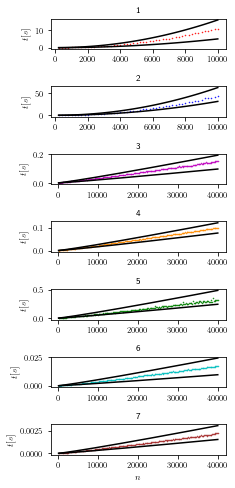

In [33]:
figure, axes = new_subplots(n_rows=7, height=25*7)

# Insertion sort
g_quad = np.power(n_datas_random[0][:find_last_non_nan(n_datas_random[0])+1],2)
n_quad = n_datas_random[0][:find_last_non_nan(n_datas_random[0])+1]
c1_insertion_sort = 10**(-7.3)
c2_insertion_sort = 10**(-6.8)
g1_insertion_sort = g_quad*c1_insertion_sort
g2_insertion_sort = g_quad*c2_insertion_sort

ax = axes[0]
alg_index = alg_index_dict['insertion_sort']
ax.set_ylabel('$t [s]$')
ax.plot(n_datas_random[alg_index], t_random_data[alg_index], label=sort_alg_titles[alg_index], color = plot_colors[alg_index], marker = '.', markersize = 1, linestyle = 'None')
ax.plot(n_quad, g1_insertion_sort, color = 'k')
ax.plot(n_quad, g2_insertion_sort, color = 'k')
ax.set_title('1')

# Bubble sort
c1_bubble_sort = 10**(-6.5)
c2_bubble_sort = 10**(-6.2)
g1_bubble_sort = g_quad*c1_bubble_sort
g2_bubble_sort = g_quad*c2_bubble_sort

ax = axes[1]
alg_index = alg_index_dict['bubble_sort']
ax.set_ylabel('$t [s]$')
ax.plot(n_datas_random[alg_index], t_random_data[alg_index], label=sort_alg_titles[alg_index], color = plot_colors[alg_index], marker = '.', markersize = 1, linestyle = 'None')
ax.plot(n_quad, g1_bubble_sort, color = 'k')
ax.plot(n_quad, g2_bubble_sort, color = 'k')
ax.set_title('2')

# Merge sort
alg_index = alg_index_dict['merge_sort']
g_lg = n_datas_random[alg_index]*np.log2(n_datas_random[alg_index])
n_lg = n_datas_random[alg_index]
c1_merge_sort = 10**(-6.8)
c2_merge_sort = 10**(-6.5)
g1_merge_sort = g_lg*c1_merge_sort
g2_merge_sort = g_lg*c2_merge_sort

ax = axes[2]
ax.set_ylabel('$t [s]$')
ax.plot(n_datas_random[alg_index], t_random_data[alg_index], label=sort_alg_titles[alg_index], color = plot_colors[alg_index], marker = '.', markersize = 1, linestyle = 'None')
ax.plot(n_lg, g1_merge_sort, color = 'k')
ax.plot(n_lg, g2_merge_sort, color = 'k')
ax.set_title('3')

# Merge/Insertion sort
alg_index = alg_index_dict['merge_insertion_sort']
c1_merge_insertion_sort = 10**(-6.9)
c2_merge_insertion_sort = 10**(-6.7)
g1_merge_insertion_sort = g_lg*c1_merge_insertion_sort
g2_merge_insertion_sort = g_lg*c2_merge_insertion_sort

ax = axes[3]
ax.set_ylabel('$t [s]$')
ax.plot(n_datas_random[alg_index], t_random_data[alg_index], label=sort_alg_titles[alg_index], color = plot_colors[alg_index], marker = '.', markersize = 1, linestyle = 'None')
ax.plot(n_lg, g1_merge_insertion_sort, color = 'k')
ax.plot(n_lg, g2_merge_insertion_sort, color = 'k')
ax.set_title('4')

# Quicksort
alg_index = alg_index_dict['quick_sort']
c1_quick_sort = 10**(-6.4)
c2_quick_sort = 10**(-6.1)
g1_quick_sort = g_lg*c1_quick_sort
g2_quick_sort = g_lg*c2_quick_sort

ax = axes[4]
ax.set_ylabel('$t [s]$')
ax.plot(n_datas_random[alg_index], t_random_data[alg_index], label=sort_alg_titles[alg_index], color = plot_colors[alg_index], marker = '.', markersize = 1, linestyle = 'None')
ax.plot(n_lg, g1_quick_sort, color = 'k')
ax.plot(n_lg, g2_quick_sort, color = 'k')
ax.set_title('5')

# Sorted
alg_index = alg_index_dict['sorted']
c1_sorted = 10**(-7.8)
c2_sorted = 10**(-7.4)
g1_sorted = g_lg*c1_sorted
g2_sorted = g_lg*c2_sorted

ax = axes[5]
ax.set_ylabel('$t [s]$')
ax.plot(n_datas_random[alg_index], t_random_data[alg_index], label=sort_alg_titles[alg_index], color = plot_colors[alg_index], marker = '.', markersize = 1, linestyle = 'None')
ax.plot(n_lg, g1_sorted, color = 'k')
ax.plot(n_lg, g2_sorted, color = 'k')
ax.set_title('6')

# Numpy Sort
alg_index = alg_index_dict['Numpy_sort']
c1_numpy = 10**(-8.6)
c2_numpy = 10**(-8.3)
g1_numpy = g_lg*c1_numpy
g2_numpy = g_lg*c2_numpy

ax = axes[6]
ax.set_ylabel('$t [s]$')
ax.plot(n_datas_random[alg_index], t_random_data[alg_index], label=sort_alg_titles[alg_index], color = plot_colors[alg_index], marker = '.', markersize = 1, linestyle = 'None')
ax.plot(n_lg, g1_numpy, color = 'k')
ax.plot(n_lg, g2_numpy, color = 'k')
ax.set_title('7')


ax.set_xlabel('$n$')
figure.tight_layout()
figure.savefig(plot_dir+'Alg_Complexities.pdf', bbox_inches='tight')


### Linear complexity

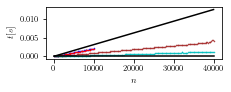

In [34]:
plot_order_index = 1


g = np.array(n_datas_sorted[-1])
n_g = n_datas_sorted[-1]
c1 = 10**(-10)
c2 = 10**(-6.5)
g1 = g*c1
g2 = g*c2


figure, axes = new_subplots(n_rows=1)
ax = axes
for i in plot_order[plot_order_index][-4:]:
    ax.plot(n_datas_sorted[i], t_sorted_data[i], label=sort_alg_titles[i], color = plot_colors[i], marker = '.', markersize = 1, linestyle = 'None')

ax.plot(n_g, g1, color = 'k', label=r'$g*c_1$')
ax.plot(n_g, g2, color = 'k', label=r'$g*c_2$')

ax.set_xlabel('$n$')
ax.set_ylabel('$t [s]$')

figure.tight_layout()
figure.savefig(plot_dir+'Plot_Linear_Complexity.pdf', bbox_inches='tight')


## Comparing Quicksort variants

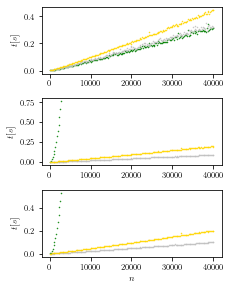

In [35]:
figure, axes = new_subplots(n_rows=3)

ax = axes[0]
ax.set_ylabel('$t [s]$')
for i in range(6,9):
    ax.plot(n_datas_random[i], t_random_data[i], label=sort_alg_titles[i], color = plot_colors[i], marker = '.', markersize = 1, linestyle = 'None')

ax = axes[1]
ax.set_ylabel('$t [s]$')
for i in range(6,9):
    ax.plot(n_datas_sorted[i], t_sorted_data[i], label=sort_alg_titles[i], color = plot_colors[i], marker = '.', markersize = 1, linestyle = 'None')

ax = axes[2]
ax.set_ylabel('$t [s]$')
for i in range(6,9):
    ax.plot(n_datas_reverse[i], t_reverse_data[i], label=sort_alg_titles[i], color = plot_colors[i], marker = '.', markersize = 1, linestyle = 'None')

ax.set_xlabel('$n$')

figure.tight_layout()

 
figure.savefig(plot_dir+'Quicksort_Comparison.pdf', bbox_inches='tight')